# Contents:



*   [About Data](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)
*   [Exploratory Data Analysis](#eda)
*   [Preprocessing](#prep)
*   [Modelling](#model)

# Libraries:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score


import pickle


import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Data:

In [2]:
#!unzip "/content/drive/MyDrive/churn.zip" -d "/content/drive/MyDrive/churn"


In [3]:
curr_dir = "/content/drive/MyDrive/churn/"
%cd /content/drive/MyDrive/churn/

/content/drive/MyDrive/churn


In [4]:
df = pd.read_csv(curr_dir + "WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Splitting:

In [8]:
X = df.drop(columns = ['customerID', 'Churn'])
y = df['Churn']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, stratify= y, random_state= 42)

<a name = "eda"></a> 
# EDA:

In [10]:
# make a copy
dfc = X_train.copy()
dfc['Churn'] = y_train

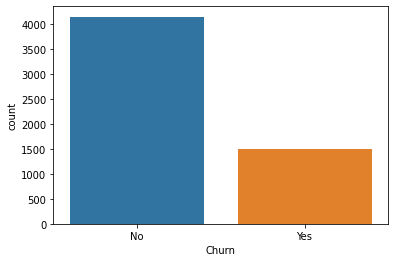

In [11]:
sns.countplot(dfc.Churn);

In [12]:
dfc.Churn.value_counts(normalize = True)

No     0.734647
Yes    0.265353
Name: Churn, dtype: float64

## Analyzing Customer Demographics:

In [13]:
dfc.gender.value_counts()

Male      2833
Female    2801
Name: gender, dtype: int64

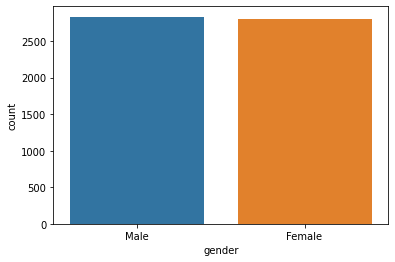

In [14]:
sns.countplot(dfc.gender);

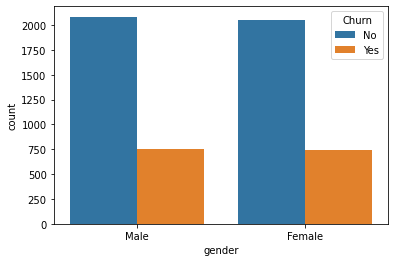

In [15]:
sns.countplot(data = dfc , x = 'gender', hue = 'Churn');

In [16]:
dfc.SeniorCitizen.value_counts(normalize = True)

0    0.836706
1    0.163294
Name: SeniorCitizen, dtype: float64

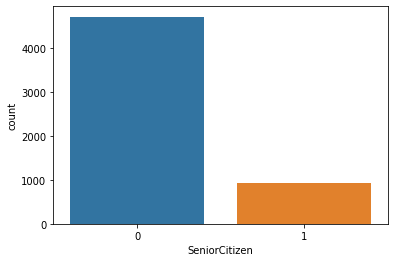

In [17]:
sns.countplot(dfc.SeniorCitizen);

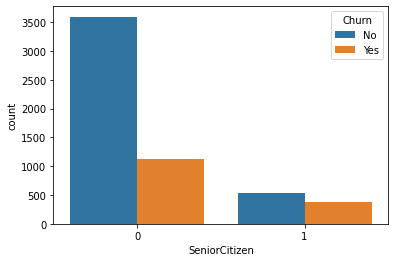

In [18]:
sns.countplot(data = dfc, x ='SeniorCitizen', hue = 'Churn');

In [19]:
dfc.groupby(['SeniorCitizen', 'Churn'])['Churn'].count()

SeniorCitizen  Churn
0              No       3597
               Yes      1117
1              No        542
               Yes       378
Name: Churn, dtype: int64

In [20]:
dfc.Partner.value_counts(normalize = True)

No     0.515619
Yes    0.484381
Name: Partner, dtype: float64

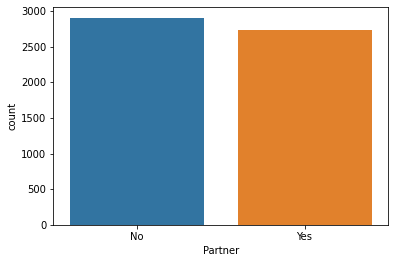

In [21]:
sns.countplot(dfc.Partner);

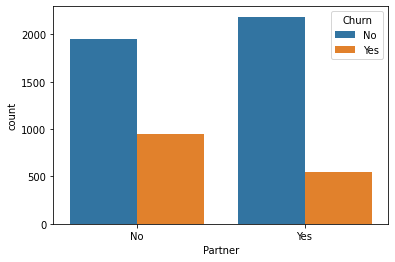

In [22]:
sns.countplot(data = dfc , x = 'Partner', hue = 'Churn');

In [23]:
dfc.Dependents.value_counts(normalize = True)

No     0.701988
Yes    0.298012
Name: Dependents, dtype: float64

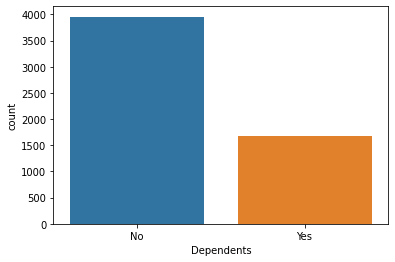

In [24]:
sns.countplot(dfc.Dependents);

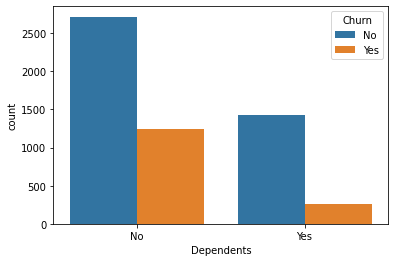

In [25]:
sns.countplot(data = dfc , x = 'Dependents', hue = 'Churn');

## Services:

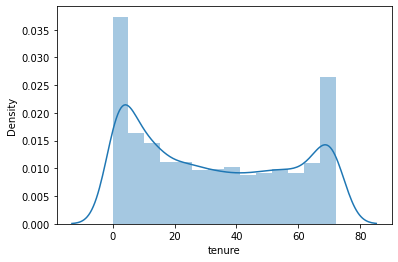

In [26]:
sns.distplot(dfc.tenure);

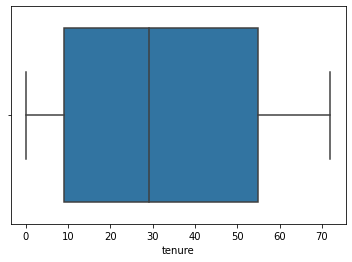

In [27]:
sns.boxplot(dfc.tenure);

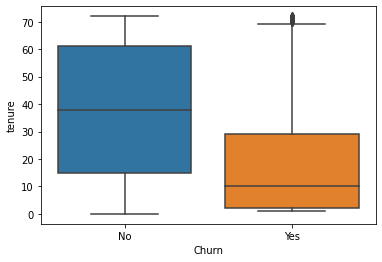

In [28]:
sns.boxplot(data = dfc, y = 'tenure', x = 'Churn');

In [29]:
dfc.groupby('Churn')['tenure'].mean()

Churn
No     37.587582
Yes    18.358528
Name: tenure, dtype: float64

In [30]:
dfc.PhoneService.value_counts(normalize = True)

Yes    0.900781
No     0.099219
Name: PhoneService, dtype: float64

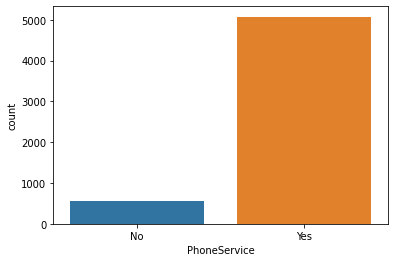

In [31]:
sns.countplot(dfc.PhoneService);

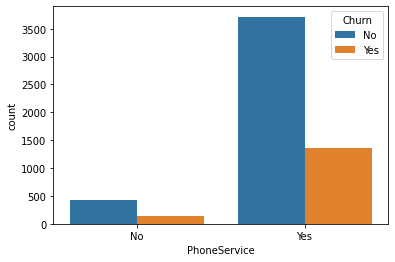

In [32]:
sns.countplot(data = dfc, x = 'PhoneService', hue = 'Churn');

In [33]:
dfc.groupby(['PhoneService', 'Churn'])['PhoneService'].count()

PhoneService  Churn
No            No        424
              Yes       135
Yes           No       3715
              Yes      1360
Name: PhoneService, dtype: int64

In [34]:
dfc.MultipleLines.value_counts(normalize = True)

No                  0.476571
Yes                 0.424210
No phone service    0.099219
Name: MultipleLines, dtype: float64

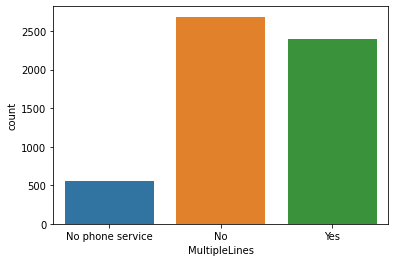

In [35]:
sns.countplot(dfc.MultipleLines);

In [36]:
dfc['MultipleLines'] = dfc['MultipleLines'].apply(lambda x: x if x in ['Yes', 'No'] else 'No')

In [37]:
dfc.MultipleLines.value_counts(normalize = True)

No     0.57579
Yes    0.42421
Name: MultipleLines, dtype: float64

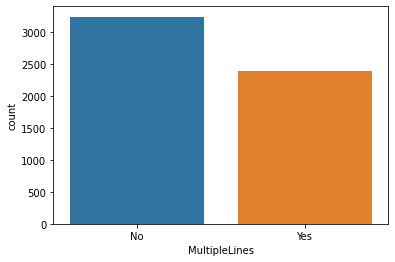

In [38]:
sns.countplot(dfc.MultipleLines);

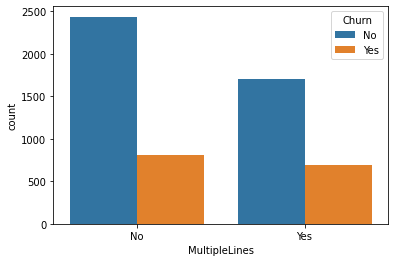

In [39]:
sns.countplot(data = dfc, x = 'MultipleLines', hue = 'Churn');

In [40]:
dfc.InternetService.value_counts(normalize = True)

Fiber optic    0.440717
DSL            0.343805
No             0.215477
Name: InternetService, dtype: float64

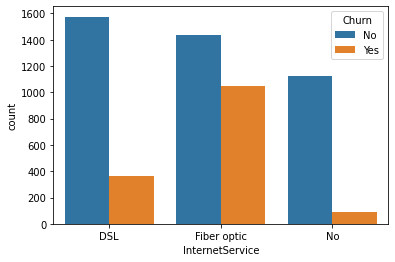

In [41]:
sns.countplot(data = dfc, x = 'InternetService', hue = 'Churn');

In [42]:
dfc.groupby(['InternetService', 'Churn'])['Churn'].count() 

InternetService  Churn
DSL              No       1575
                 Yes       362
Fiber optic      No       1438
                 Yes      1045
No               No       1126
                 Yes        88
Name: Churn, dtype: int64

In [43]:
dfc.OnlineSecurity.value_counts(normalize = True)

No                     0.496450
Yes                    0.288072
No internet service    0.215477
Name: OnlineSecurity, dtype: float64

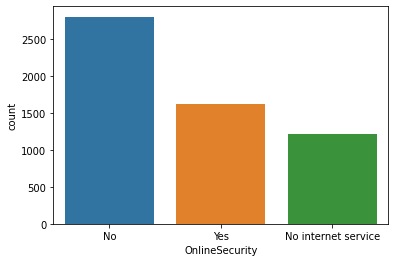

In [44]:
sns.countplot(dfc.OnlineSecurity);

In [45]:
dfc['OnlineSecurity'] = dfc['OnlineSecurity'].apply(lambda x: x if x in ['Yes', 'No'] else 'No')

In [46]:
dfc.OnlineSecurity.value_counts(normalize = True)

No     0.711928
Yes    0.288072
Name: OnlineSecurity, dtype: float64

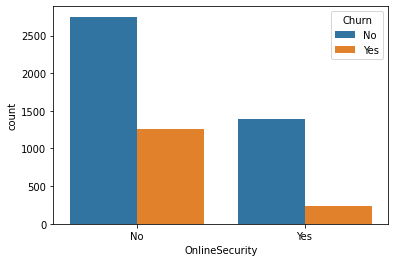

In [47]:
sns.countplot(data = dfc, x = 'OnlineSecurity', hue = 'Churn');

In [48]:
dfc.OnlineBackup.value_counts(normalize = True)

No                     0.433440
Yes                    0.351083
No internet service    0.215477
Name: OnlineBackup, dtype: float64

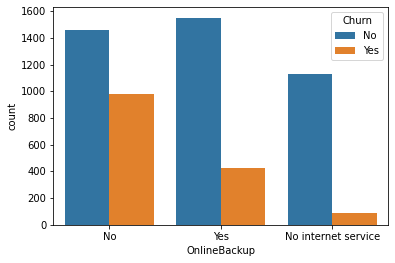

In [49]:
sns.countplot(data = dfc, x = 'OnlineBackup', hue = 'Churn');

In [50]:
dfc.OnlineBackup = dfc.OnlineBackup.apply(lambda x: x if x in ['Yes', 'No'] else 'No')

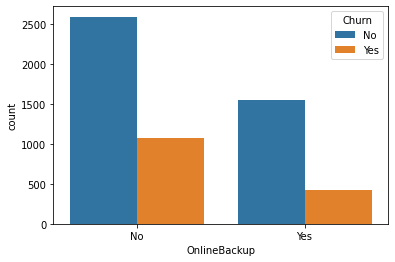

In [51]:
sns.countplot(data = dfc, x = 'OnlineBackup', hue = 'Churn');

In [52]:
dfc.DeviceProtection.value_counts(normalize= True)

No                     0.438765
Yes                    0.345758
No internet service    0.215477
Name: DeviceProtection, dtype: float64

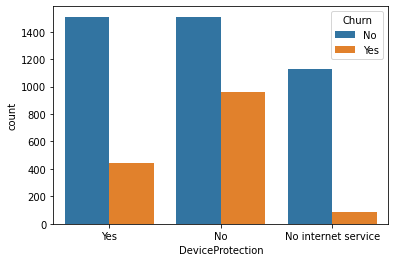

In [53]:
sns.countplot(data = dfc, x = 'DeviceProtection', hue = 'Churn');

In [54]:
dfc.DeviceProtection = dfc.DeviceProtection.apply(lambda x: x if x in ['No', 'Yes'] else 'No')

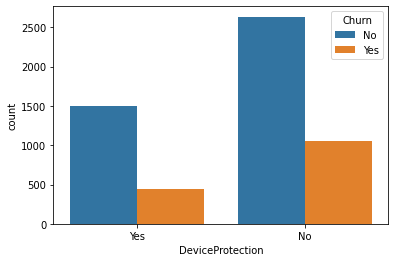

In [55]:
sns.countplot(data = dfc, x = 'DeviceProtection', hue = 'Churn');

In [56]:
dfc.groupby(['DeviceProtection', 'Churn'])['Churn'].count()

DeviceProtection  Churn
No                No       2635
                  Yes      1051
Yes               No       1504
                  Yes       444
Name: Churn, dtype: int64

In [57]:
dfc.TechSupport.value_counts()

No                     2771
Yes                    1649
No internet service    1214
Name: TechSupport, dtype: int64

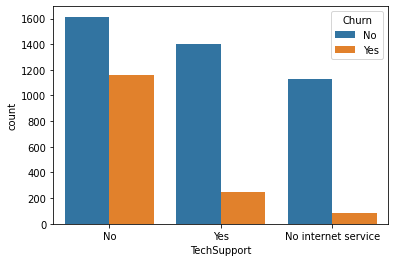

In [58]:
sns.countplot(data = dfc, x = 'TechSupport', hue = 'Churn');

In [59]:
dfc.TechSupport = dfc.TechSupport.apply(lambda x: x if x in ['No', 'Yes'] else 'No')

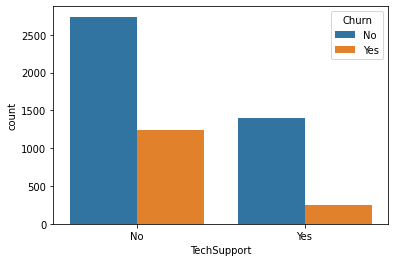

In [60]:
sns.countplot(data = dfc, x = 'TechSupport', hue = 'Churn');

In [61]:
dfc.StreamingTV.value_counts(normalize = True)

No                     0.395101
Yes                    0.389421
No internet service    0.215477
Name: StreamingTV, dtype: float64

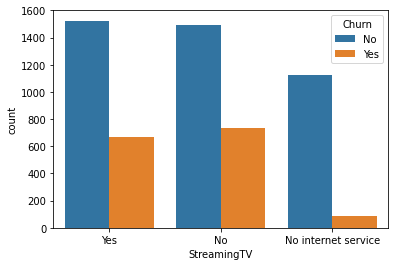

In [62]:
sns.countplot(data = dfc, x = 'StreamingTV', hue = 'Churn');

In [63]:
dfc.StreamingTV = dfc.StreamingTV.apply(lambda x: x if x in ['Yes', 'No'] else "No")

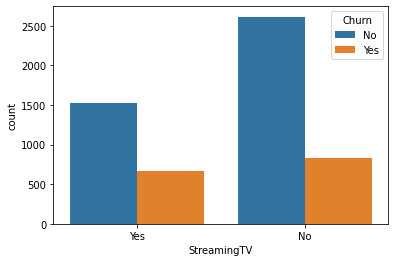

In [64]:
sns.countplot(data = dfc, x = 'StreamingTV', hue = 'Churn');

In [65]:
dfc.groupby(['StreamingTV', 'Churn'])['Churn'].count()

StreamingTV  Churn
No           No       2615
             Yes       825
Yes          No       1524
             Yes       670
Name: Churn, dtype: int64

In [66]:
dfc.StreamingMovies.value_counts(normalize = True)

No                     0.393504
Yes                    0.391019
No internet service    0.215477
Name: StreamingMovies, dtype: float64

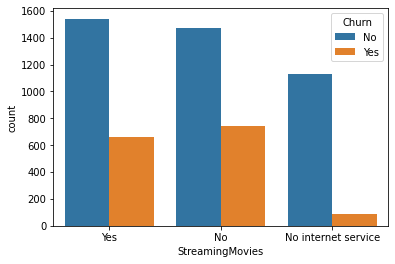

In [67]:
sns.countplot(data = dfc, x = 'StreamingMovies', hue = 'Churn');

In [68]:
dfc.StreamingMovies = dfc.StreamingMovies.apply(lambda x: x if x in ['Yes', 'No'] else "No")

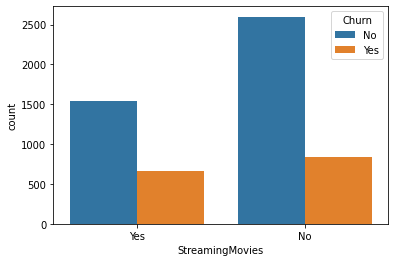

In [69]:
sns.countplot(data = dfc, x = 'StreamingMovies', hue = 'Churn');

## Analyzing Contract and Billing features

In [70]:
dfc.Contract.value_counts(normalize = True)

Month-to-month    0.550586
Two year          0.241214
One year          0.208200
Name: Contract, dtype: float64

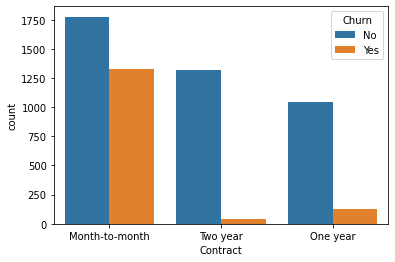

In [71]:
sns.countplot(data = dfc, x = 'Contract', hue = 'Churn');

In [72]:
dfc.PaperlessBilling.value_counts(normalize = True)

Yes    0.591232
No     0.408768
Name: PaperlessBilling, dtype: float64

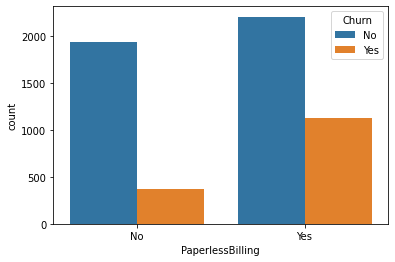

In [73]:
sns.countplot(data = dfc, x = 'PaperlessBilling', hue = 'Churn');

In [74]:
dfc.PaymentMethod.value_counts(normalize = True)

Electronic check             0.335641
Mailed check                 0.228257
Bank transfer (automatic)    0.220802
Credit card (automatic)      0.215300
Name: PaymentMethod, dtype: float64

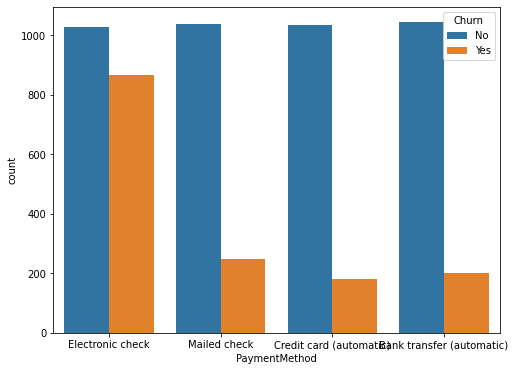

In [75]:
plt.figure(figsize = (8, 6))
sns.countplot(data = dfc, x = 'PaymentMethod', hue = 'Churn');

In [76]:
dfc.MonthlyCharges.describe()

count    5634.000000
mean       64.929961
std        30.138105
min        18.400000
25%        35.662500
50%        70.500000
75%        90.000000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [77]:
dfc.groupby('Churn')['MonthlyCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,4139.0,61.343187,31.135396,18.40,25.15,64.40,88.175,118.75
Yes,1495.0,74.860167,24.603757,18.85,56.90,79.95,94.400,118.35


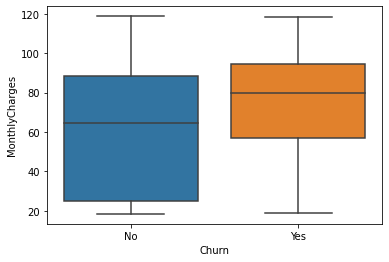

In [78]:
sns.boxplot(data = dfc, x = 'Churn', y = 'MonthlyCharges');

In [79]:
dfc.TotalCharges = dfc.TotalCharges.replace(" ",  np.nan)
dfc['TotalCharges'] = pd.to_numeric( dfc.TotalCharges)


In [80]:
dfc.TotalCharges.isna().sum()

8

In [81]:
dfc.TotalCharges.describe()

count    5626.000000
mean     2302.604266
std      2279.173176
min        18.850000
25%       407.275000
50%      1398.125000
75%      3838.612500
max      8684.800000
Name: TotalCharges, dtype: float64

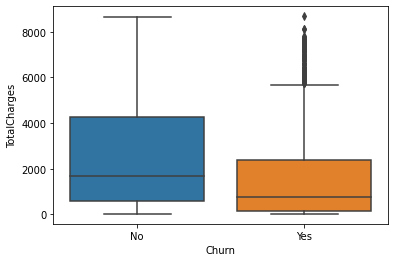

In [82]:
sns.boxplot(data = dfc, x = 'Churn', y = 'TotalCharges');

In [83]:
dfc.Churn = dfc.Churn.replace({'Yes': 1, 'No': 0})

In [84]:
df_dummies = pd.get_dummies(dfc)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3738,0,35,49.20,1701.65,0,0,1,1,0,1,...,1,1,0,0,1,0,0,0,1,0
3151,0,15,75.10,1151.55,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
4860,0,13,40.55,590.35,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,1
3867,0,26,73.50,1905.70,0,1,0,0,1,1,...,1,0,0,1,0,1,0,1,0,0
3810,0,1,44.55,44.55,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0


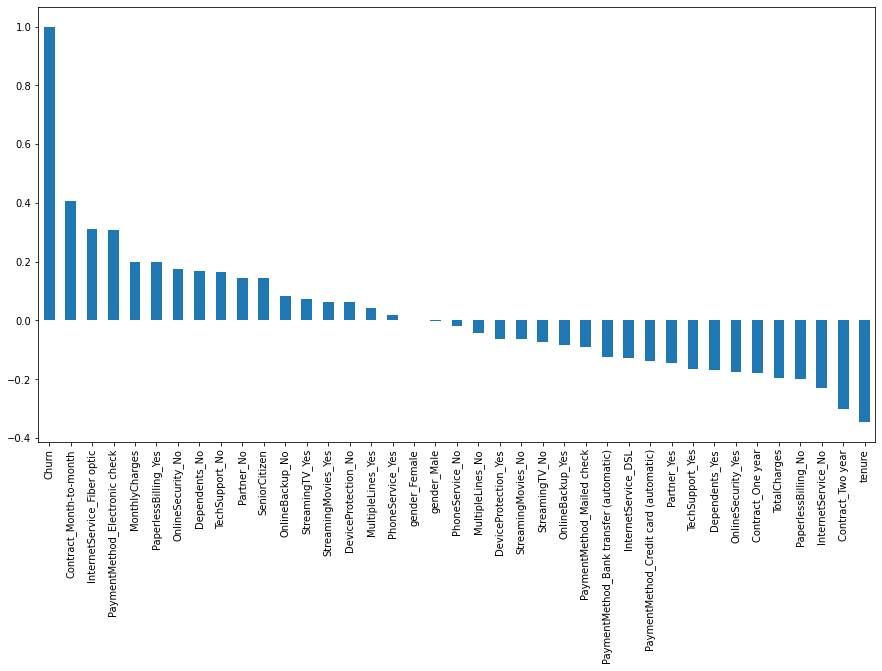

In [85]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar');

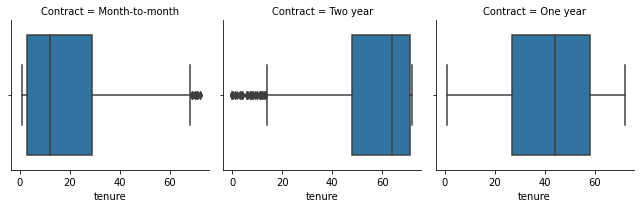

In [86]:
g = sns.FacetGrid(data = dfc, col = 'Contract')
g.map(sns.boxplot, 'tenure');

# Notes:


*   About 25% of customers churned.
*   Churn Rate is higher for Senior Citizen.
*   Churn rate is higher for customers without partners.
*   Churn rate is higher for customers without dependents.
*   Churned customers have average tenure (about 17 months) less than non-churned customers (37 months).
*  Customers who didn't subscribe for InternetService have the lowest churn rate compared to who did, Fiber Optics subscribers churn more than DSL subscribers.
*   Churn rate is higher for customers who don't use Online Security service.
*   Churn rate is higher for customers who don't use Online Backup service.
*   Churn rate is higher for customers who don't use Device Security service.
*   Churn rate is higher for customers who use Streaming TV service.
*   Churn rate is higher for customers who use Streaming Movies service.
*   Churn rate is very high for month to month contracts.
*   Customers with Two years contract have the lowest churn rate.
*   Customers with Paperless Billing have the highest churn rate.
*   Customers who use electronic check as payment method have the highest churn rate.
*   Customers who churn have on average high monthly charges.
*   Customers who churn have on average lower total charges.
*   Customers who use month-to-month contract have the lowest tenure average.











  









<a name = 'prep'></a>
# Preprocessing:

In [87]:
def cleaning(X, y, features):
  X_clean = X.copy()
  y_clean = y.copy()
  y_clean.replace({"Yes": 1, "No": 0}, inplace= True)
  X_clean = X_clean[features]
  X_clean['TotalCharges'] = pd.to_numeric(X_clean['TotalCharges'], errors = 'coerce')
  X_clean['TotalCharges'] = X_clean['TotalCharges'].fillna(X_clean['TotalCharges'].mean())
  X_clean = pd.get_dummies(X_clean, drop_first= True)

  return X_clean, y_clean


In [88]:
features = [ 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']


In [89]:
X_train2, y_train2 = cleaning(X_train, y_train, features)
X_test2, y_test2 = cleaning(X_test, y_test, features)

In [90]:
X_train2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3738,0,35,49.20,1701.65,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3151,0,15,75.10,1151.55,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4860,0,13,40.55,590.35,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3867,0,26,73.50,1905.70,1,0,0,0,0,0,...,0,1,0,1,0,1,1,1,0,0
3810,0,1,44.55,44.55,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Scaling:

In [91]:
numeric_feat= ['tenure', 'MonthlyCharges', 'TotalCharges']

In [92]:
scaler = MinMaxScaler()
X_train2[numeric_feat] = scaler.fit_transform(X_train2[numeric_feat])
X_test2[numeric_feat] = scaler.transform(X_test2[numeric_feat])

<a name = 'model'></a>
# Modeling:

## Logistic Regression:

In [93]:
log_reg = LogisticRegression()
log_reg.fit(X_train2, y_train2)
y1 = log_reg.predict(X_test2)

In [94]:
def model_assess(model_name, y_pred, y_true = y_test2):

  print(f"{model_name} recall is : {recall_score(y_pred, y_true)}")
  print("\n")
  print(classification_report(y_pred, y_true))
  print("\n")
  sns.heatmap(confusion_matrix(y_pred, y_true), annot= True, fmt = 'd')
  plt.show()

Logistic Regression recall is : 0.6428571428571429


              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1087
           1       0.55      0.64      0.59       322

    accuracy                           0.80      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.81      0.80      0.80      1409





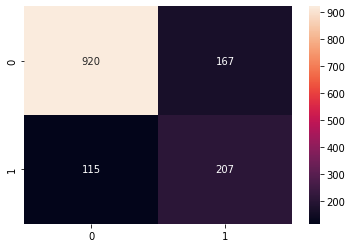

In [95]:
model_assess('Logistic Regression', y1)

In [96]:
pickle.dump(log_reg, open('log_reg.pkl', 'wb'))

## Random Forest:

In [97]:
rf = RandomForestClassifier(n_estimators=500 ,  n_jobs = -1,
                                  random_state =50, max_features = 5,
                                  max_leaf_nodes = 5)
rf.fit(X_train2, y_train2)
y2 = rf.predict(X_test2)

Random Forest recall is : 0.6904761904761905


              precision    recall  f1-score   support

           0       0.95      0.79      0.86      1241
           1       0.31      0.69      0.43       168

    accuracy                           0.78      1409
   macro avg       0.63      0.74      0.65      1409
weighted avg       0.87      0.78      0.81      1409





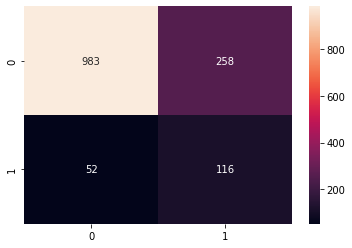

In [98]:
model_assess("Random Forest", y2)

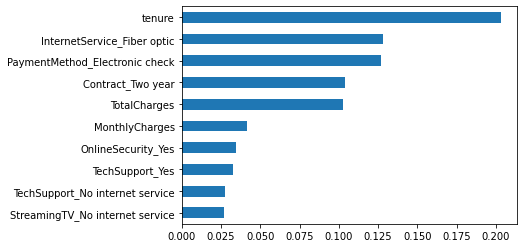

In [99]:
importances = rf.feature_importances_
weights = pd.Series(importances, index=X_train2.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh');

In [100]:
pickle.dump(rf, open('rf.pkl', 'wb'))

## Support Vector Machine:

In [101]:
svc_model = SVC(kernel='linear', C= 10) 
svc_model.fit(X_train2,y_train2)
y3 = svc_model.predict(X_test2)


Support Vector Machine recall is : 0.61875


              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1089
           1       0.53      0.62      0.57       320

    accuracy                           0.79      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.80      0.79      0.79      1409





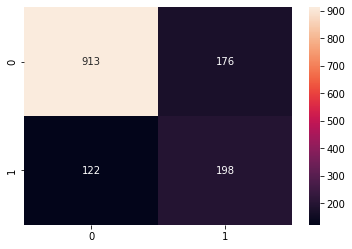

In [102]:
model_assess('Support Vector Machine', y3)

In [103]:
pickle.dump(svc_model, open('svc.pkl', 'wb'))

## Adaboost Classifier:

In [104]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train2, y_train2)
y4 = ada_model.predict(X_test2)

Adaboost Classifier recall is : 0.6363636363636364


              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1090
           1       0.54      0.64      0.59       319

    accuracy                           0.80      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.81      0.80      0.80      1409





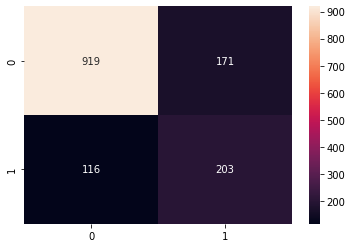

In [105]:
model_assess("Adaboost Classifier", y4)

In [106]:
pickle.dump(ada_model, open('adaboost.pkl', 'wb'))

## XGB-classifier:

In [107]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train2, y_train2)
y5 = xgb_model.predict(X_test2)

XGB Classifier recall is : 0.6563573883161512


              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1118
           1       0.51      0.66      0.57       291

    accuracy                           0.80      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.82      0.80      0.81      1409





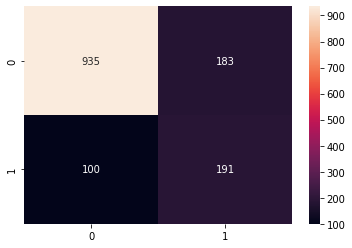

In [108]:
model_assess("XGB Classifier", y5)

In [109]:
pickle.dump(xgb_model, open('xgb.pkl', 'wb'))